In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 設定 data_path
dir_data = '../data/data-science-london-scikit-learn'

test = pd.read_csv(dir_data + '/test.csv', header=None)
trainLabel = pd.read_csv(dir_data + '/trainLabels.csv', header=None)[0]
train = pd.read_csv(dir_data + '/train.csv', header=None)

In [7]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('trainLabel shape:', trainLabel.shape)
train.head()

('train shape:', (1000, 40))
('test shape:', (9000, 40))
('trainLabel shape:', (1000,))


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [9]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [10]:
# KNN with cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

X, y = train, np.ravel(trainLabel)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/share/homes/teinhonglo/.local/lib/python2.7/site-packages/sklearn/utils/__init__.py:12: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/share/homes/teinhonglo/.local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ball_tree import BallTree
/share/homes/teinhonglo/.local/lib/python2.7/site-packages/sklearn/neighbors/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .kd_tree import KDTree
/share/homes/teinhonglo/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/share/homes/teinhonglo/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py

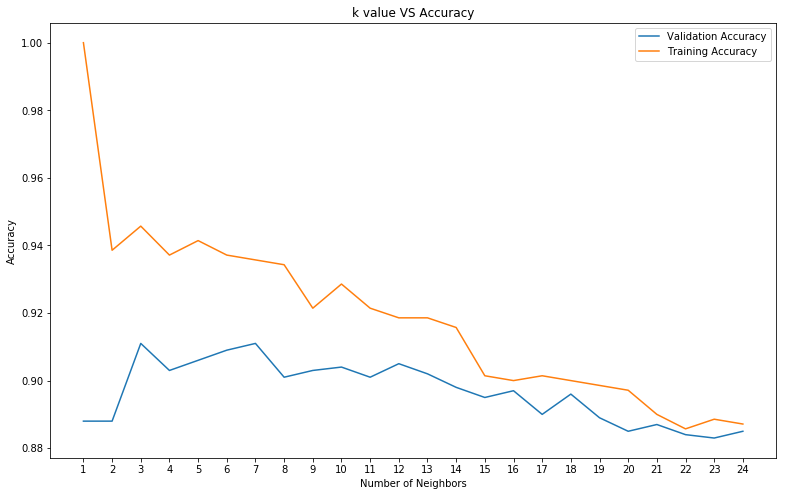

('Best Accuracy without feature scaling:', 0.9109999999999999)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [11]:
# Model complexity
neig = np.arange(1, 25)
kfold = 10
train_accuracy = []
val_accuracy = []
bestKnn = None
bestAcc = 0.0
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    val_accuracy.append(np.mean(cross_val_score(knn, X, y, cv=kfold)))
    if np.mean(cross_val_score(knn, X, y, cv=kfold)) > bestAcc:
        bestAcc = np.mean(cross_val_score(knn, X, y, cv=10))
        bestKnn = knn

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy, label = 'Validation Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)

In [12]:
# predict test
test_fill = np.nan_to_num(test)
submission = pd.DataFrame(bestKnn.predict(test_fill))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission

(9000, 1)


,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [13]:
submission.to_csv('knn_no_normalization.csv', index=False)